FYS-STK project 2\
By David Svejda, Gianmarco Puleo and Henrik Breitenstein

All of the results are generated from scripts in this file

# Finding suitable parameter values

We start by optimising the learningrate, the number of epochs and the regularisation parameter lambda for stochastic gradient descent. First we optimise the learning rate and number of epoch with a small regularisation parameter by looking at how the accuracy and cross-entropy changes based on the parameters.

In [2]:
import Hyper as hp
import optimisers as op

# Momentum

Before optimizing the learning rate and number of epochs we need a suitable momentum. To find this we do a small test of different values:

In [ ]:
Llist = np.arange(1, 4, 0.5)
Lmd = 1e-4
[lr_range, ep_range] = [np.logspace(-4, 0, 5), np.logspace(1, 2, 5)]
shapes = (64, 10)
train, test, val, train_tar, test_tar, val_tar = Data.load_data()
for L in Llist:
    name = None
    Run(L, lr_range, ep_range, 22, train, train_tar, test, test_tar, Cross_Entropy, shapes, AF.SoftMax(), op.MomentumOptimiser, name, Lmd)

Where we choose $\text{Momentum} = 1.5$ since this had one of the best accuracies whith a low number of epochs.

# Learning Rate Schedule

For optimizing parameters together with a learning rate schedule we first do a test on a smaller range of parameters to find a suitable value for the number of steps before the learning rate is halved. 

In [ ]:
L = 1.5
Lmd = 1e-4
[lr_range, ep_range, t1] = [np.logspace(-4, 0, 3), np.logspace(1, 2, 3), np.logspace(2, 0, 10)]
shapes = (64, 10)
train, test, val, train_tar, test_tar, val_tar = Data.load_data()
schedules = [lrs.hyperbolic_lr, lrs.linear_lr, lrs.exponential_lr]
opts = [op.Optimiser, op.MomentumOptimiser]
for opt in opts:
    for schedule in schedules:
        print(f'{schedule.__name__:-^20}')
        for t in t1:
            name = None
            Run(L, lr_range, ep_range, 22, train, train_tar, test, test_tar, Cross_Entropy, shapes, AF.SoftMax(), opt, name, Lmd, t, schedule)


Whith the one giving best result highlighted

Normal optimiser:

**hyperbolic schedule:** $\Theta = 215$ 

linear schedule: $\Theta = 774$

exponential schedule: $\Theta = 774$

With momentum:

**hyperbolic schedule:** $\Theta = 464$

linear schedule: $\Theta = 774$

exponential schedule: $\Theta = 215$

We are then ready to do the optimazation for five different optimisers: Momentum Optimiser, AdaGrad, Adam, RMSProp and Learning Rate Schedule optimiser. First we take a look at the results from each optimization step for the optimiser with momentum. The momentum was set to $3$ after testing a small range of momentums. With theregularisation parameter set to $\lambda = 10^{-4}$ we get the following heat map for accuracy and cross-entropy respectivly.

In [ ]:
Llist = [0, 1.5, 0, 0, 0]
t1 = [215, 464, None, None, None]
opts = [op.Optimiser, op.MomentumOptimiser, op.AdaGradOptimiser, op.AdamOptimiser, op.RMSPropOptimiser]
schedules = [lrs.hyperbolic_lr, lrs.hyperbolic_lr, None, None, None]

def base(L, t1, schedule, opt):
    Lmd = 1e-4
    [lr_range, ep_range] = [np.logspace(-4, 0, 10), np.logspace(2, 3, 10)]
    shapes = (64, 10)
    train, test, val, train_tar, test_tar, val_tar = Data.load_data()
    name = f't{t1}hyperbolic'
    hp.Run(L, lr_range, ep_range, 22, train, train_tar, test, test_tar, Cross_Entropy, shapes, AF.SoftMax(), opt, name, Lmd, t, schedule)

In [ ]:
#Optimiser
base(0, 215, lrs.hyperbolic_lrs, op.Optimiser)

In [ ]:
#MomentumOptimiser
base(1.5, 464, lrs.hyperbolic_lrs, op.MomentumOptimiser)

In [ ]:
#AdaGradOptimiser
base(0, 0, 0, op.Optimiser)

In [ ]:
#AdamOptimiser
base(0, 0, 0, op.AdamOptimiser)

In [ ]:
#RMSPropOptimiser
base(0, 0, 0, op.RMSPropOptimiser)

We plot them:

In [6]:
from plot import *
import os

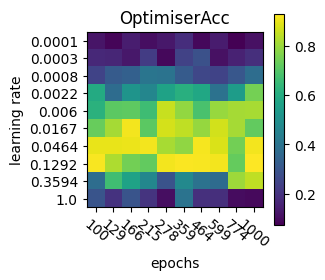

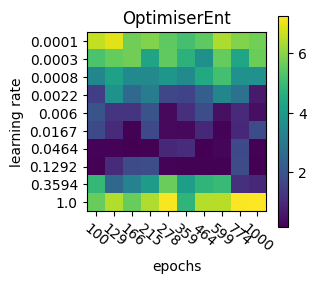

In [8]:
opt = 'Optimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
for item in os.listdir('Data/NrHidden0/Optimiser/LrEpoch'):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"Data/Plots/{opt}{item[:3]}.png")

Where we choose: Lr $= 0.1$ and Epochs $= 100$.

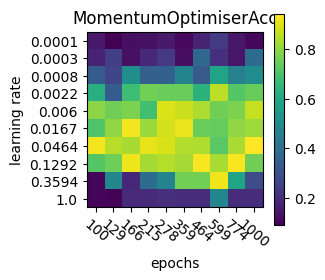

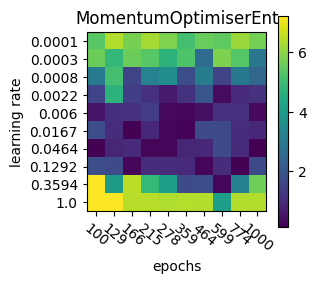

In [10]:
opt = 'MomentumOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"Data/Plots/{opt}{item[:3]}.png")

Where we choose: Lr $= 0.046$ and Epochs $= 100$.

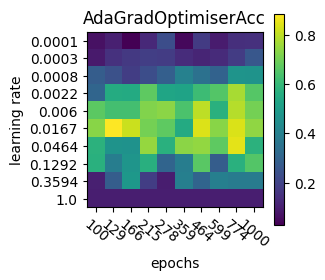

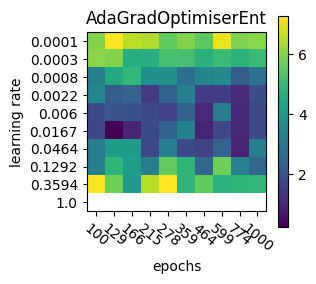

In [15]:
opt = 'AdaGradOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"Data/Plots/{opt}{item[:3]}.png")

Where we choose: Lr $= 0.01$ and Epochs $= 130$.

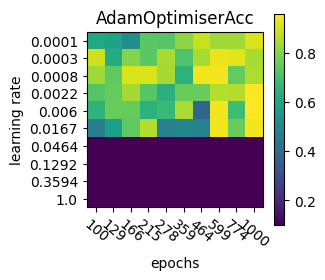

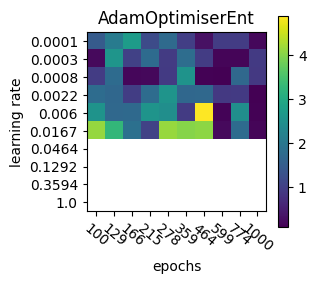

In [13]:
opt = 'AdamOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"Data/Plots/{opt}{item[:3]}.png")

Where we choose: Lr $= 0.0008$ and Epochs $= 600$.

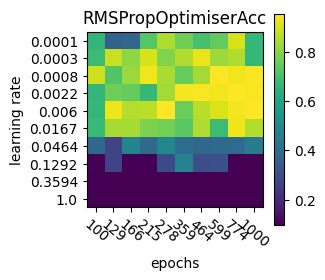

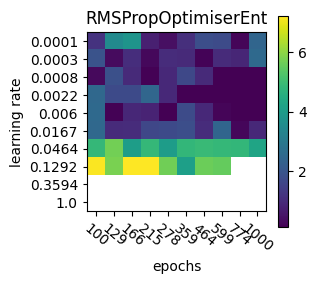

In [16]:
opt = 'RMSPropOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"Data/Plots/{opt}{item[:3]}.png")

Where we choose: Lr $= 0.0022$ and Epochs $= 780$.

With these we optimize for the regularisation parameter $\lambda$

In [1]:
import lrSchedules as lrs

In [ ]:
#Optimiser Momentum, Lr, Epochs, t1
hp.SendToLambda(0, 0.1, 100, 215, op.Optimiser, lrs.hyperbolic_lr)

..................................................

Lmd: 0.000676734693877551, Best Acc: 0.9303621169916435, Best CE: 0.9136490250696379


In [3]:
#MomentumOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(1.5, 0.046, 100, 464, op.MomentumOptimiser, lrs.hyperbolic_lr)

..................................................

Lmd: 0.0005151020408163266, Best Acc: 0.9387186629526463, Best CE: 0.9387186629526463


In [4]:
#AdaGradOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(0, 0.01, 130, 0, op.AdaGradOptimiser, 0)

..................................................

Lmd: 0.0005757142857142857, Best Acc: 0.8885793871866295, Best CE: 0.883008356545961


In [5]:
#AdamOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(0, 8e-4, 600, 0, op.AdamOptimiser, 0)

..................................................

Lmd: 0.000959591836734694, Best Acc: 0.958217270194986, Best CE: 0.9554317548746518


In [ ]:
#RMSPropOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(0, 0.0022, 780, 0, op.RMSPropOptimiser, 0)

.